In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("/Users/sripradharavi/Documents/world indicators.csv", thousands=',')

Dropping NaN Columns

In [3]:
data=data.drop(['Business Tax Rate','Hours to do Tax', 'Days to Start Business', 'Ease of Business', 'Number of Records'], 1)


In [4]:
data=data.fillna(0)
Date=pd.to_datetime(data['Year'])
data['year']=Date.dt.year

In [5]:
data.head()

,Country,Region,Year,Birth Rate,CO2 Emissions,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,...,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,year
0,Algeria,Africa,01/12/00,0.020,87931.0,26998.0,5.479006e+10,0.035,60.0,0.034,...,67.0,0.003,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0,2000
1,Angola,Africa,01/12/00,0.050,9542.0,7499.0,9.129595e+09,0.034,22.0,0.128,...,44.0,0.002,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0,2000
2,Benin,Africa,01/12/00,0.043,1617.0,1983.0,2.359122e+09,0.043,15.0,0.090,...,53.0,0.008,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0,2000
3,Botswana,Africa,01/12/00,0.027,4276.0,1836.0,5.788312e+09,0.047,152.0,0.054,...,49.0,0.127,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0,2000
4,Burkina Faso,Africa,01/12/00,0.046,1041.0,0.0,2.610959e+09,0.051,12.0,0.096,...,49.0,0.002,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0,2000


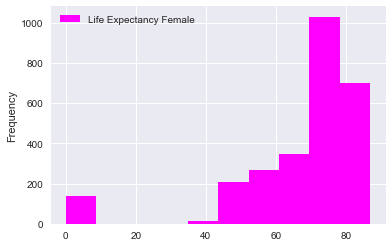

In [6]:
data.plot(kind='hist', x='Mobile Phone Usage', y='Life Expectancy Female', colormap='spring')

In [7]:
data.columns

Index(['Country', 'Region', 'Year', 'Birth Rate', 'CO2 Emissions',
       'Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population 0-14', 'Population 15-64', 'Population 65+',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound', 'year'],
      dtype='object')

Which countries spend more than 14% of their GDP on Healthcare? 

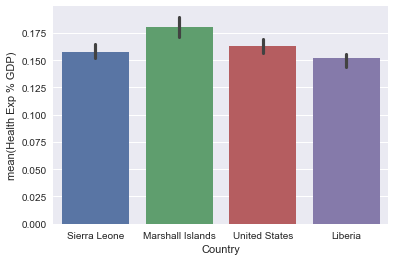

In [8]:
greater_than_14=data[data['Health Exp % GDP']>0.14]
sn.barplot(data=greater_than_14, y='Health Exp % GDP', x='Country')

[<matplotlib.text.Text at 0x10f24fba8>, <matplotlib.text.Text at 0x10f243358>]

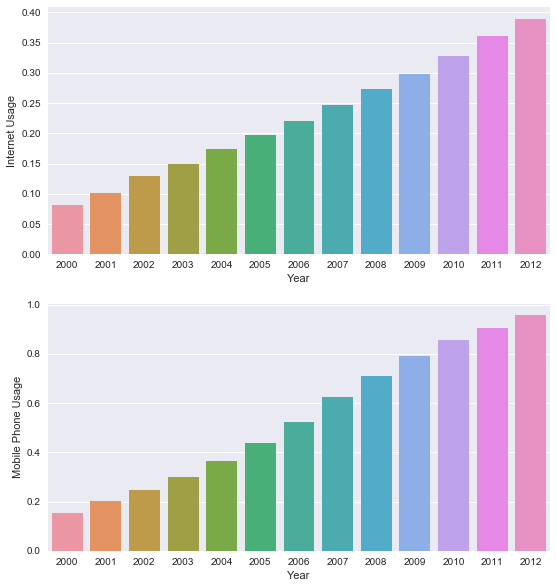

In [9]:
fig, (ax1,ax2)=plt.subplots(nrows=2)
fig.set_size_inches(9,10)
internetAgg=pd.DataFrame(data.groupby("year")["Internet Usage"].mean()).reset_index()
internetSorted=internetAgg.sort_values(by="year", ascending=False)
a=sn.barplot(data=internetSorted,x="year",y="Internet Usage", ax=ax1)
ax1.set(xlabel="Year", ylabel="Internet Usage")

fig.set_size_inches(9,10)
phoneAgg=pd.DataFrame(data.groupby("year")["Mobile Phone Usage"].mean()).reset_index()
phoneSorted=phoneAgg.sort_values(by="year", ascending=False)
b=sn.barplot(data=phoneSorted,x="year",y="Mobile Phone Usage", ax=ax2)
ax2.set(xlabel="Year", ylabel="Mobile Phone Usage")

MULTIPLE LINEAR REGRESSION

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
train=data[:2000]
test=data[2000:]
x=train[['Birth Rate','CO2 Emissions','Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate']]
y=train['Population Total']
xtest=test[['Birth Rate','CO2 Emissions','Energy Usage', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate']]
ytest=test['Population Total']
linReg=linear_model.LinearRegression()
linReg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
ypred=linReg.predict(xtest)
ypred

array([  5.87643769e+06,  -5.06704885e+07,   1.93651377e+06,
        -1.10699754e+07,   2.09072583e+07,   8.54755594e+07,
        -7.72898970e+07,   9.93443071e+06,   1.43992310e+08,
         2.03302837e+07,  -4.09254207e+06,  -2.60328210e+06,
         2.19172697e+07,   4.93205683e+06,   1.41218798e+07,
         2.50630491e+07,   1.05519621e+08,   2.04254149e+07,
         3.26980690e+07,   1.48601884e+07,   1.51608623e+07,
         1.39545400e+07,   5.71132994e+06,   4.83294104e+06,
         4.18452628e+06,   8.24192226e+06,   7.04830610e+06,
        -1.73188954e+06,   5.53014846e+06,   6.24347142e+06,
         1.53676531e+07,  -1.89596867e+06,  -2.42352471e+06,
        -2.27596227e+06,   5.67433676e+05,   4.95365296e+06,
         2.08435474e+07,   8.26846553e+06,   6.41042286e+06,
         6.07021302e+06,   1.21091145e+05,   7.19891535e+06,
         1.15807694e+07,   1.11078534e+07,   6.40172267e+07,
         5.43008590e+06,   7.50132111e+06,   9.75357469e+05,
        -1.77180997e+06,

What's the performance of this Multiple Linear Regression: 

In [12]:
print('R^2:',linReg.score(x,y))

R^2: 0.69106857996


Mean Squared Error: 

In [13]:
mean_squared_error(ytest,ypred)

16387409336256126.0

Importing required modules for generating plots:

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np


In [16]:

def data_to_plotly(x):
    k = []
    
    for i in range(0, len(x)):
        k.append(x[i][0])
        
    return k

data_to_plotly(y)

IndexError: invalid index to scalar variable.

In [ ]:
p1 = go.Scatter(x=data_to_plotly(xtest), 
                y=ytest, 
                mode='markers',
                marker=dict(color='black')
               )

p2 = go.Scatter(x=data_to_plotly(xtest), 
                y=linReg.predict(xtest),
                mode='lines',
                line=dict(color='blue', width=3)
                )

layout = go.Layout(xaxis=dict(ticks='', showticklabels=False,
                              zeroline=False),
                   yaxis=dict(ticks='', showticklabels=False,
                              zeroline=False),
                   showlegend=False, hovermode='closest')

fig = go.Figure(data=[p1, p2], layout=layout)

py.iplot(fig)